## Install PyTorch

In [1]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import numpy as np


In [3]:
data = [[1,2],[3,4]]
tensors= torch.tensor(data)

In [4]:
tensors

tensor([[1, 2],
        [3, 4]])

## Create tensor using Numpy

In [5]:
np_array = np.arange(10)
tensor_np = torch.from_numpy(np_array)


In [6]:
tensor_np

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.int32)

## shape,ndim and dtype

In [7]:
tensor_np.shape


torch.Size([10])

In [8]:
tensor_np.ndim

1

In [9]:
tensor_np.dtype

torch.int32

In [10]:
ten1=torch.tensor([1,2,3])
ten2=torch.tensor([4,5,6])
ten1+ten2

tensor([5, 7, 9])

In [11]:
torch.add(ten1,ten2)

tensor([5, 7, 9])

In [12]:
torch.sub(ten2,ten1)

tensor([3, 3, 3])

In [13]:
torch.subtract(ten2,ten1)

tensor([3, 3, 3])

In [14]:
ten1*10

tensor([10, 20, 30])

## Matrix Multiplication

In [15]:
torch.matmul(ten1,ten2)

tensor(32)

In [16]:
matrix4_3 = torch.tensor([[1,2,3],
[4,5,6],
[7,8,9],
[10,11,12]])

In [17]:
matrix4_3.shape

torch.Size([4, 3])

In [18]:
matrix3_2 = torch.tensor([[1,2],
[3,4],
[5,6]])

In [19]:
matrix3_2.shape

torch.Size([3, 2])

In [20]:
result = torch.matmul(matrix4_3,matrix3_2)

In [21]:
result

tensor([[ 22,  28],
        [ 49,  64],
        [ 76, 100],
        [103, 136]])

In [22]:
result.shape

torch.Size([4, 2])

In [23]:
torch.mm(matrix4_3,matrix3_2)

tensor([[ 22,  28],
        [ 49,  64],
        [ 76, 100],
        [103, 136]])

In [24]:
matrix4_3

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

In [25]:
matrix4_3.T

tensor([[ 1,  4,  7, 10],
        [ 2,  5,  8, 11],
        [ 3,  6,  9, 12]])

Transpose of the matrix

In [26]:
torch.t(matrix4_3)

tensor([[ 1,  4,  7, 10],
        [ 2,  5,  8, 11],
        [ 3,  6,  9, 12]])

PyTorch operations based on TensorShape
- Zeros
- Ones
- Random
- Full 



In [27]:
tensorZeroes = torch.zeros((3,3))
tensorZeroes

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [28]:
tensorOnes = torch.ones((3,3))
tensorOnes

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [29]:
tensorRandomN = torch.randn((3,3)) #includes negative tensors
tensorRandomN

tensor([[ 0.8580, -0.3080,  0.3225],
        [-0.2866, -0.4037, -0.3936],
        [ 3.1394, -0.9952,  1.0874]])

In [30]:
tensorRandom = torch.rand((3,3)) #includes only positive tensors
tensorRandom

tensor([[0.1946, 0.4143, 0.4328],
        [0.0415, 0.2204, 0.7507],
        [0.0779, 0.9622, 0.0324]])

In [31]:
customFill = torch.full((3,3),5)
customFill

tensor([[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]])

In [32]:
initialFill = torch.full((3,3),0.01)
initialFill

tensor([[0.0100, 0.0100, 0.0100],
        [0.0100, 0.0100, 0.0100],
        [0.0100, 0.0100, 0.0100]])

Torchvision is a popular computer vision library in PyTorch, providing tools and datasets for image and video analysis, along with pre-trained models for tasks such as image classification, object detection, and image generation. It's a go-to resource for researchers and practitioners working with deep learning in the field of computer vision.

In [33]:
pip install torchvision --no-deps

Note: you may need to restart the kernel to use updated packages.


In [34]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn

In [35]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
root="data",
train=True,
download=True,
transform=ToTensor(),
)

In [36]:
# Download test data from open datasets.
test_data = datasets.FashionMNIST(
root="data",
train=False,
download=True,
transform=ToTensor(),
)

In [37]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [45]:
import matplotlib.pyplot as plt

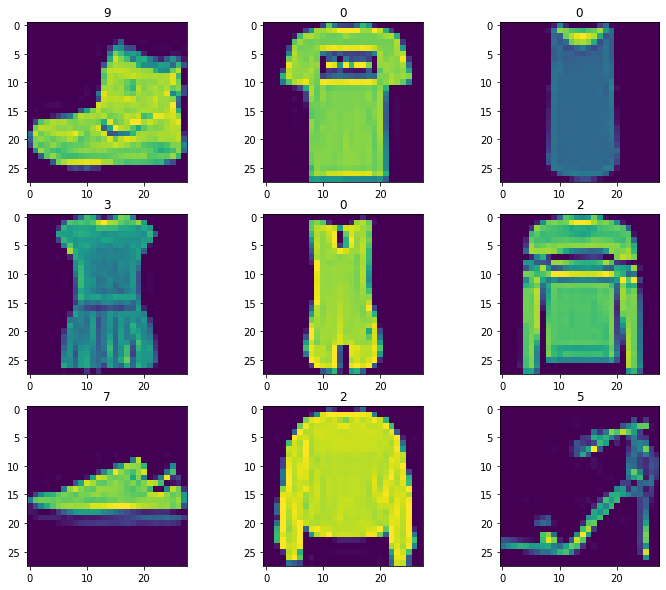

In [49]:


plt.figure(figsize=(12,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    sample_image,sample_label = training_data[i]
    plt.imshow(sample_image[0])
    plt.title(sample_label)

In [50]:
batch_size = 64

training = DataLoader(training_data,batch_size=batch_size)
testing = DataLoader(test_data, batch_size=batch_size)

for X, y in testing:
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")
    break

Shape of X: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64])


In [51]:
for X,y in training:
    print(torch.max(X))
    print(torch.min(X))
    break

tensor(1.)
tensor(0.)


There is no need for scaling data loader will do the following.

## Model Training

In [60]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.flatten = nn.Flatten()
        self.build_model = nn.Sequential(
        nn.Linear(28*28,512), #28*28 is input shape
        nn.ReLU(),
        nn.Linear(512,512), #hidden layer
        nn.ReLU(),
        nn.Linear(512,10) #output layer
    )
    def forward(self,x):
        x = self.flatten(x)
        dnn = self.build_model(x)
        return dnn

In [61]:
model = NeuralNetwork()

In [62]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

In [72]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
                      # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if batch % 100 == 0:
        loss, current = loss.item(), batch * len(X)
        print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [77]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            test_loss /= num_batches
            correct /= size
            print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [79]:
for epoch in range(5):
    print(f"Epochs {epoch+1}")
    train(training, model, loss_fn, optimizer)
    test(testing, model, loss_fn)

Epochs 1
Test Error: 
 Accuracy: 0.4%, Avg loss: 0.005865 

Test Error: 
 Accuracy: 0.5%, Avg loss: 0.004744 

Test Error: 
 Accuracy: 0.5%, Avg loss: 0.005394 

Test Error: 
 Accuracy: 0.4%, Avg loss: 0.005621 

Test Error: 
 Accuracy: 0.4%, Avg loss: 0.005632 

Test Error: 
 Accuracy: 0.5%, Avg loss: 0.005100 

Test Error: 
 Accuracy: 0.4%, Avg loss: 0.005368 

Test Error: 
 Accuracy: 0.5%, Avg loss: 0.005455 

Test Error: 
 Accuracy: 0.4%, Avg loss: 0.005652 

Test Error: 
 Accuracy: 0.4%, Avg loss: 0.006571 

Test Error: 
 Accuracy: 0.5%, Avg loss: 0.006052 

Test Error: 
 Accuracy: 0.4%, Avg loss: 0.005991 

Test Error: 
 Accuracy: 0.5%, Avg loss: 0.005235 

Test Error: 
 Accuracy: 0.5%, Avg loss: 0.005008 

Test Error: 
 Accuracy: 0.4%, Avg loss: 0.005451 

Test Error: 
 Accuracy: 0.4%, Avg loss: 0.006691 

Test Error: 
 Accuracy: 0.4%, Avg loss: 0.005869 

Test Error: 
 Accuracy: 0.4%, Avg loss: 0.006614 

Test Error: 
 Accuracy: 0.4%, Avg loss: 0.006108 

Test Error: 
 Accuracy